# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [268]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
pip install citipy

## Generate Cities List

In [79]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [86]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barroso
Processing Record 2 of Set 1 | aizpute
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | hambantota
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | jumla
Processing Record 9 of Set 1 | khorixas
Processing Record 10 of Set 1 | kaeo
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | mitsamiouli
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | varnavino
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | alyangula
Processing Recor

Processing Record 41 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 42 of Set 4 | mayumba
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | iskateley
Processing Record 46 of Set 4 | urumqi
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | bronnoysund
Processing Record 49 of Set 4 | touros
Processing Record 0 of Set 5 | boralday
Processing Record 1 of Set 5 | yebaishou
Processing Record 2 of Set 5 | varniai
Processing Record 3 of Set 5 | jati
Processing Record 4 of Set 5 | namwala
Processing Record 5 of Set 5 | jamestown
Processing Record 6 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 5 | kishi
Processing Record 8 of Set 5 | quatre cocos
Processing Record 9 of Set 5 | grafton
Processing Record 10 of Set 5 | araci
Processing Record 11 of Set 5 | lethem
Processing Record 12 of Set 5 | werda
Processing Record 13 of Set 5 | drin

Processing Record 31 of Set 8 | carmen
Processing Record 32 of Set 8 | fukue
Processing Record 33 of Set 8 | vestmanna
Processing Record 34 of Set 8 | yeppoon
Processing Record 35 of Set 8 | amahai
Processing Record 36 of Set 8 | dingle
Processing Record 37 of Set 8 | harij
Processing Record 38 of Set 8 | galveston
Processing Record 39 of Set 8 | vardo
Processing Record 40 of Set 8 | dicabisagan
Processing Record 41 of Set 8 | skjervoy
Processing Record 42 of Set 8 | blue springs
Processing Record 43 of Set 8 | coihaique
Processing Record 44 of Set 8 | monte alegre
Processing Record 45 of Set 8 | boyolangu
Processing Record 46 of Set 8 | marzuq
Processing Record 47 of Set 8 | luoyang
Processing Record 48 of Set 8 | northam
Processing Record 49 of Set 8 | santa cruz de la palma
Processing Record 0 of Set 9 | itarema
Processing Record 1 of Set 9 | nizhniy kuranakh
Processing Record 2 of Set 9 | bolshoye selo
Processing Record 3 of Set 9 | liuzhou
Processing Record 4 of Set 9 | rio galleg

Processing Record 18 of Set 12 | tual
Processing Record 19 of Set 12 | chapais
Processing Record 20 of Set 12 | turukhansk
Processing Record 21 of Set 12 | leh
Processing Record 22 of Set 12 | tarabuco
Processing Record 23 of Set 12 | hofn
Processing Record 24 of Set 12 | baruun-urt
Processing Record 25 of Set 12 | issia
Processing Record 26 of Set 12 | marsaxlokk
Processing Record 27 of Set 12 | toftir
City not found. Skipping...
Processing Record 28 of Set 12 | nsunga
Processing Record 29 of Set 12 | puerto escondido
Processing Record 30 of Set 12 | ulaangom
Processing Record 31 of Set 12 | sahuaripa
Processing Record 32 of Set 12 | iralaya
Processing Record 33 of Set 12 | diapaga
Processing Record 34 of Set 12 | acapulco
Processing Record 35 of Set 12 | bubaque
Processing Record 36 of Set 12 | hammerfest
Processing Record 37 of Set 12 | beisfjord
Processing Record 38 of Set 12 | cockburn town
Processing Record 39 of Set 12 | banjarmasin
Processing Record 40 of Set 12 | rafai
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [109]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barroso,-21.1869,-43.9758,11.71,95,24,3.30,BR,1667703670
1,aizpute,56.7167,21.6000,4.57,97,53,2.70,LV,1667703672
2,mataura,-46.1927,168.8643,16.14,43,18,2.96,NZ,1667703673
3,kavaratti,10.5669,72.6420,27.11,78,55,3.63,IN,1667703430
4,hambantota,6.1241,81.1185,25.19,100,40,1.54,LK,1667703675


In [180]:
southern_hem_df = city_data_pd.loc[city_data_pd.Lat <= 0]
southern_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barroso,-21.1869,-43.9758,11.71,95,24,3.30,BR,1667703670
2,mataura,-46.1927,168.8643,16.14,43,18,2.96,NZ,1667703673
5,busselton,-33.6500,115.3333,21.83,42,6,2.48,AU,1667703423
7,khorixas,-20.3667,14.9667,21.67,31,95,1.06,NA,1667703677
8,kaeo,-35.1000,173.7833,20.74,70,100,4.70,NZ,1667703679
...,...,...,...,...,...,...,...,...,...
569,burnie,-41.0667,145.9167,18.86,70,80,2.84,AU,1667703991
570,rawson,-43.3002,-65.1023,20.04,48,99,11.59,AR,1667703992
571,voh,-20.9667,164.7000,29.20,66,39,2.75,NC,1667703992
574,eltham,-39.4292,174.3000,16.36,64,97,1.08,NZ,1667703994


In [181]:
Northern_hem_df = city_data_pd.loc[city_data_pd.Lat >= 0]
Northern_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,aizpute,56.7167,21.6000,4.57,97,53,2.70,LV,1667703672
3,kavaratti,10.5669,72.6420,27.11,78,55,3.63,IN,1667703430
4,hambantota,6.1241,81.1185,25.19,100,40,1.54,LK,1667703675
6,jumla,29.2747,82.1838,12.00,46,7,0.58,NP,1667703677
9,upernavik,72.7868,-56.1549,-5.92,71,100,8.43,GL,1667703679
...,...,...,...,...,...,...,...,...,...
581,paamiut,61.9940,-49.6678,-0.47,91,100,9.79,GL,1667703998
583,leua,48.2156,18.6071,10.83,83,100,1.43,SK,1667703730
584,tilichiki,60.4667,166.1000,-2.45,93,100,1.38,RU,1667703999
585,mosquera,4.7059,-74.2302,12.05,94,40,2.57,CO,1667704000


In [114]:
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        587 non-null    object 
 1   Lat         587 non-null    float64
 2   Lng         587 non-null    float64
 3   Max Temp    587 non-null    float64
 4   Humidity    587 non-null    int64  
 5   Cloudiness  587 non-null    int64  
 6   Wind Speed  587 non-null    float64
 7   Country     587 non-null    object 
 8   Date        587 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 41.4+ KB


In [111]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,21.389396,16.132196,13.925622,73.655877,59.441227,3.348501,1.667704e+09
std,32.801014,87.426660,12.203989,20.104356,40.956372,2.460687,1.278206e+02
min,-54.800000,-179.166700,-30.640000,1.000000,0.000000,0.000000,1.667703e+09
25%,-3.558200,-55.976100,6.225000,63.000000,14.000000,1.480000,1.667704e+09
50%,25.519800,20.040300,17.150000,78.000000,75.000000,2.850000,1.667704e+09
75%,48.735400,88.050000,23.705000,89.000000,100.000000,4.610000,1.667704e+09
max,78.218600,179.316700,35.990000,100.000000,100.000000,14.340000,1.667704e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

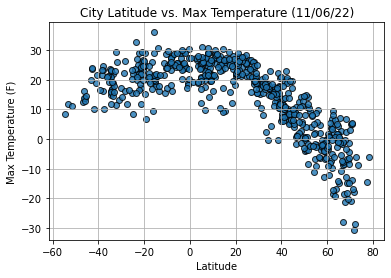

In [253]:
# Build scatter plot for latitude vs temperature
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

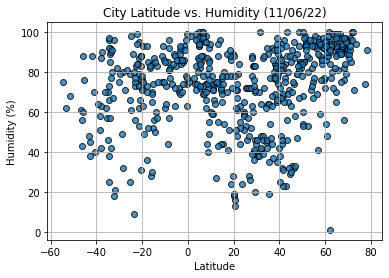

In [254]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

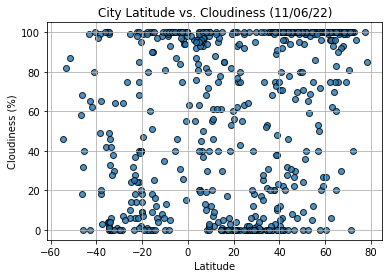

In [255]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

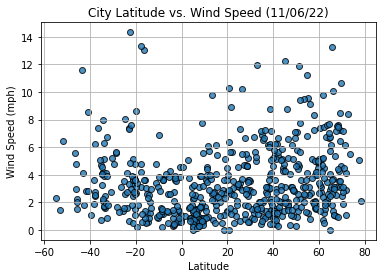

In [256]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

## Linear Regression

In [258]:
# linear modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [288]:
def plotreg(x_values, y_values, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(f"{title} - {ylabel} vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    return plt

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [285]:
x_values = Northern_hem_df['Lat']
y_values = Northern_hem_df['Max Temp']

The r-value is: 0.7420966092880646


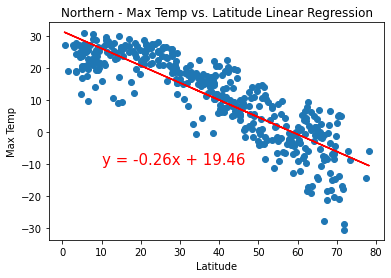

In [286]:
plt = plotreg(x_values, y_values, 'Max Temp', 'Northern')
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [289]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Max Temp']

The r-value is: 0.25878963346765615


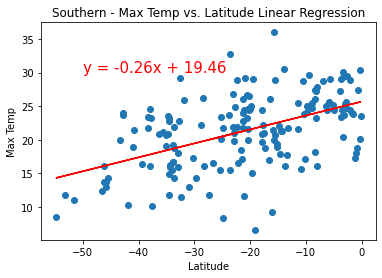

In [290]:
plt = plotreg(x_values, y_values, 'Max Temp', 'Southern')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [291]:
x_values = Northern_hem_df['Lat']
y_values = Northern_hem_df['Humidity']

The r-value is: 0.07376646885910429


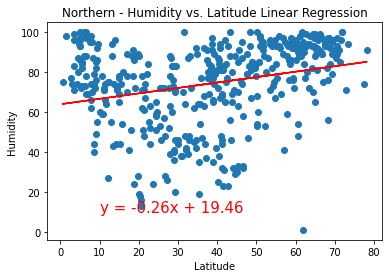

In [294]:
plt = plotreg(x_values, y_values, 'Humidity', 'Northern' )
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [295]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Humidity']

The r-value is: 0.08879348835497268


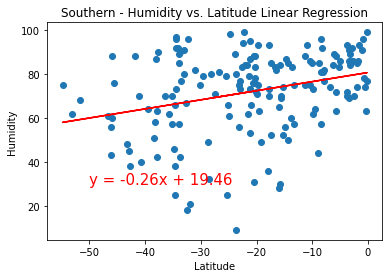

In [296]:
plt = plotreg(x_values, y_values, 'Humidity', 'Southern' )
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [298]:
x_values = Northern_hem_df['Lat']
y_values = Northern_hem_df['Cloudiness']

The r-value is: 0.10379691684782032


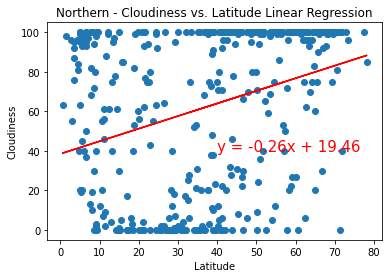

In [300]:
plt = plotreg(x_values, y_values, 'Cloudiness', 'Northern' )
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [302]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Cloudiness']

The r-value is: 0.08545524580731038


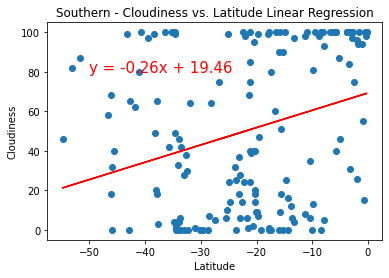

In [303]:
plt = plotreg(x_values, y_values, 'Cloudiness', 'Southern' )
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [304]:
x_values = Northern_hem_df['Lat']
y_values = Northern_hem_df['Wind Speed']

The r-value is: 0.0868862818953199


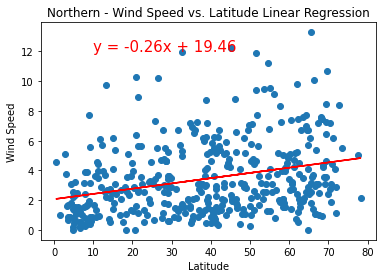

In [306]:
plt = plotreg(x_values, y_values, 'Wind Speed', 'Northern' )
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [307]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Wind Speed']

The r-value is: 0.0665360122104741


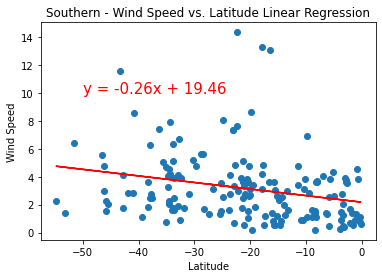

In [308]:
plt = plotreg(x_values, y_values, 'Wind Speed', 'Southern' )
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.show()